In [237]:
from demo import *

# Logistic regression



Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


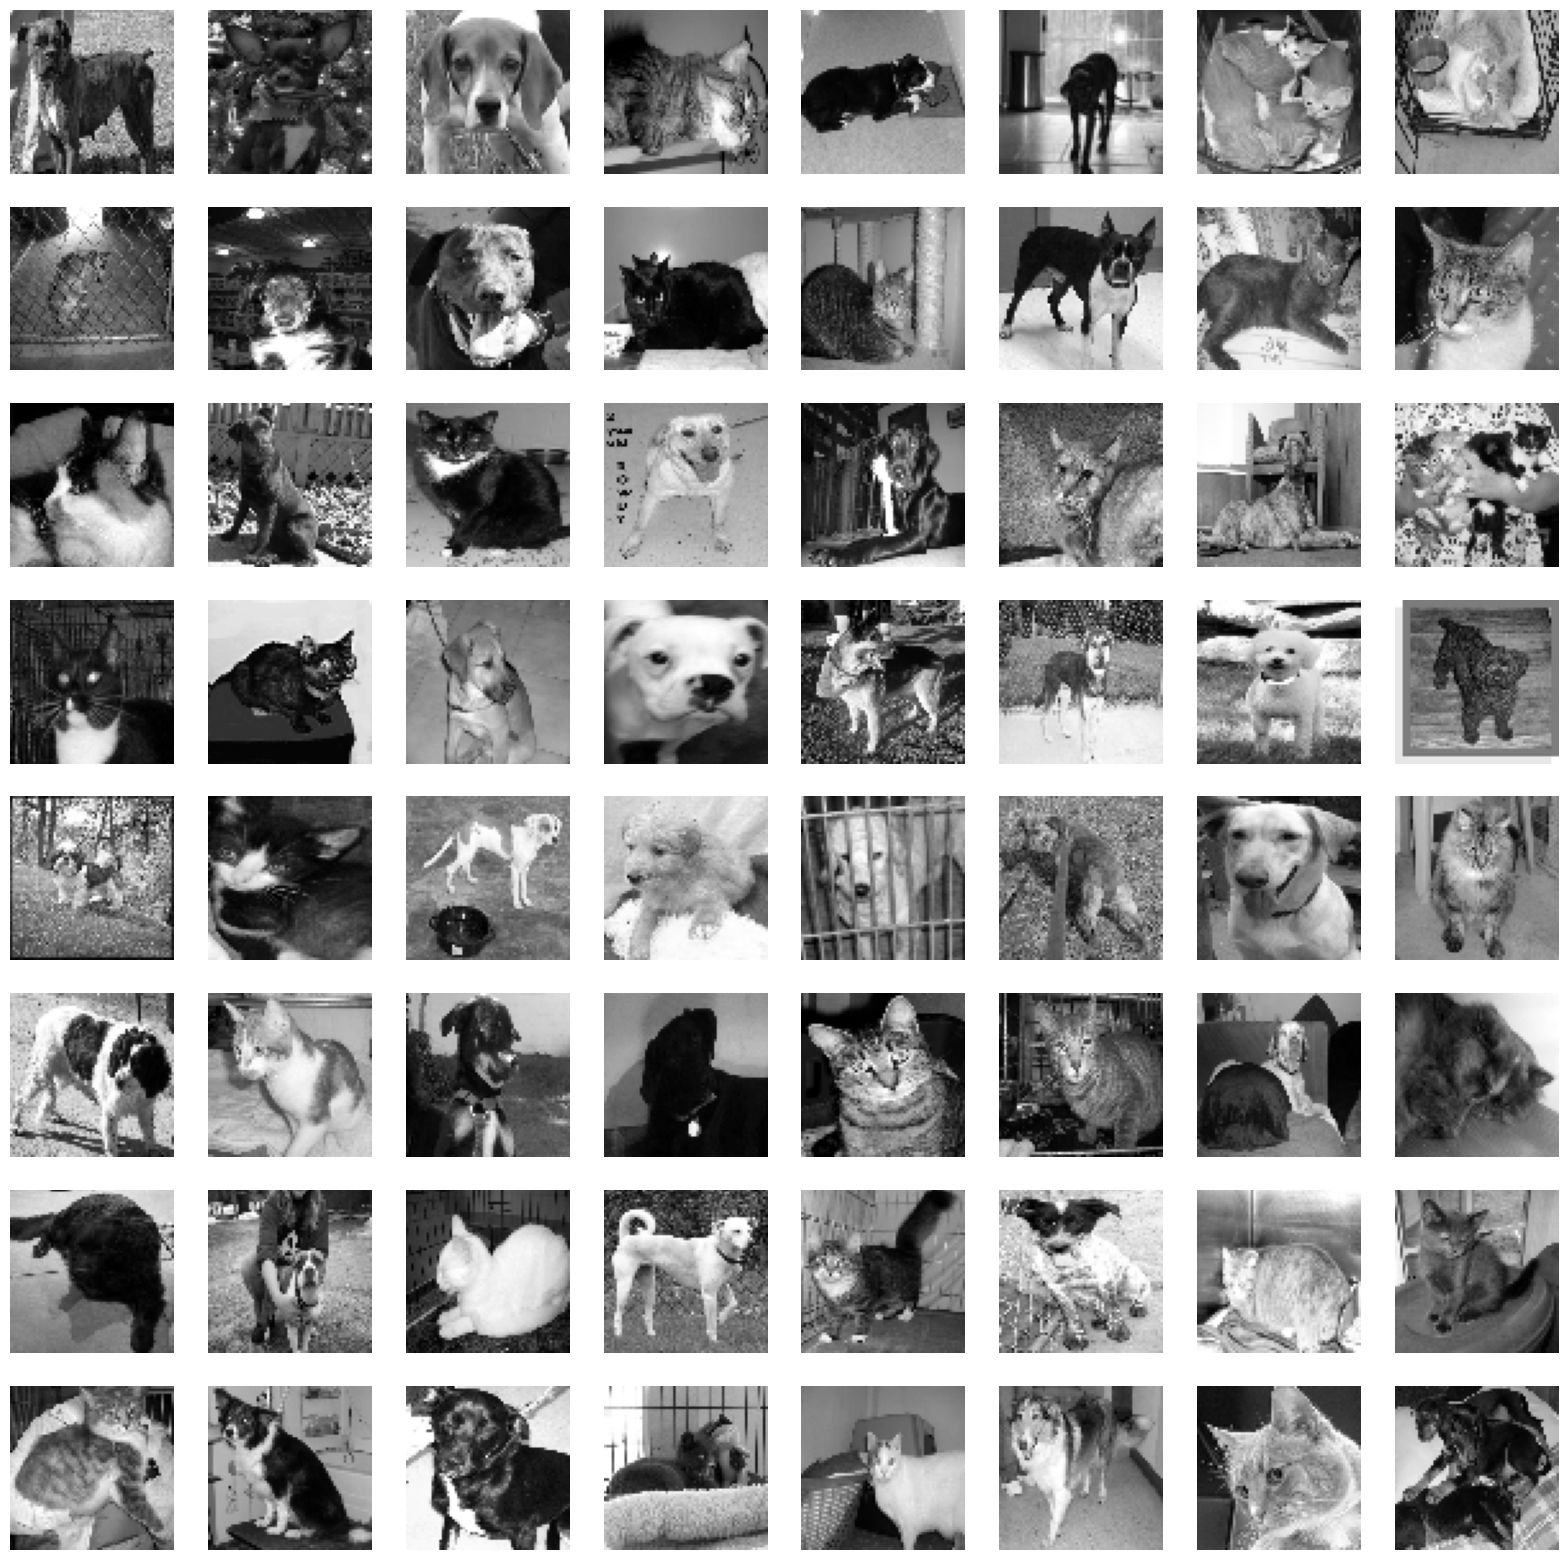

In [232]:
images, labels = get_dataset('cats_and_dogs')

In [19]:
print('Shape of images: ', images.shape)
print('Shape of labels:', labels.shape)

Shape of images:  (1027, 64, 64)
Shape of labels: (1027,)


In [234]:
X = images.reshape((images.shape[0], -1))
y = labels

print('Shape of X:', X.shape)
print('Shape of y:', X.shape)

Shape of X: (23262, 4096)
Shape of y: (23262, 4096)


In [21]:
w = np.zeros(X.shape[1] + 1)

In [22]:
def linear_function(X, w):
    w, b = w[:-1], w[-1]
    return np.dot(X, w) + b

def predict(X, w):
    return (linear_function(X, w) > 0).astype(float)

True label:  0.0  prediction:  0.0


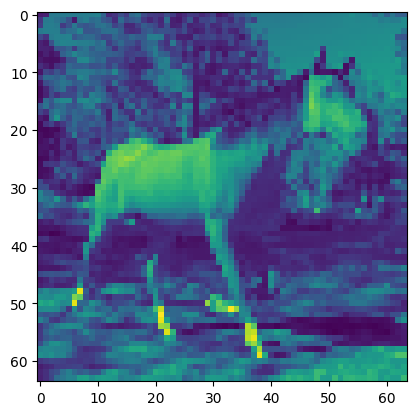

In [23]:
image = 3
plt.imshow(images[image])
print('True label: ', y[image], ' prediction: ', predict(X[image], w))

In [24]:
def accuracy(X, y, w):
    return np.mean(predict(X, w) == y)

print('Classifier accuracy: ', accuracy(X, y, w))

Classifier accuracy:  0.48685491723466406


In [25]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict_probability(X, w):
    return sigmoid(linear_function(X, w))


In [26]:
image = 4
print('True label: ', y[image], ' prediction: ', predict_probability(X[image], w))

True label:  0.0  prediction:  0.5


In [27]:
def nll(w, X, y):
    xw = linear_function(X, w)
    prob_correct = sigmoid((2 * y - 1) * xw)
    return -np.sum(np.log(prob_correct))

In [28]:
nll(w, X, y)

711.8621544350638

In [29]:
def dsigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def grad(w, X, y):
    xw = linear_function(X, w)
    signed_xw = (2 * y - 1) * xw
    prob_correct = sigmoid(signed_xw)
    dw = -np.dot((1 / prob_correct) * dsigmoid(signed_xw) * (2 * y - 1.), X)
    db = -np.sum((1 / prob_correct) * dsigmoid(signed_xw) * (2 * y - 1.))
    return np.concatenate([dw, np.atleast_1d(db)])

print(grad( w, X, y) /X.shape[0]) 

[-0.01946607 -0.01871726 -0.02047718 ... -0.02952198 -0.02973923
 -0.01314508]


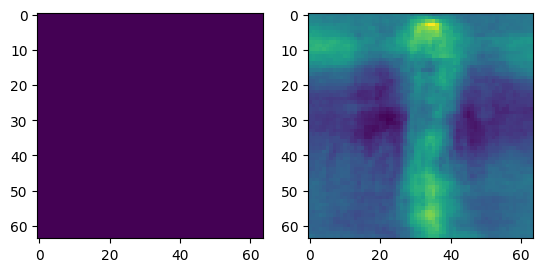

In [30]:
f, ax = plt.subplots(1, 2)
ax[0].cla(), ax[1].cla()
ax[0].imshow(w[:-1].reshape(images[0].shape))
ax[1].imshow(grad( w, X, y)[:-1].reshape(images[0].shape))

In [ ]:
def gradient_descent(value_and_grad, w0, lr, steps, X, y, images):
    f, ax = plt.subplots(1, 3, figsize=(12,4))

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, X, y)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax]
        display.clear_output(wait =True)
        
        ax[1].axis('off')
        ax[2].axis('off')
        ax[0].plot(losses)
        ax[1].imshow(weights[:-1].reshape(images[0].shape))
        ax[2].imshow(g[:-1].reshape(images[0].shape))
        ax[1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))
        display.display(f)
        time.sleep(0.001)
        
    return weights, losses

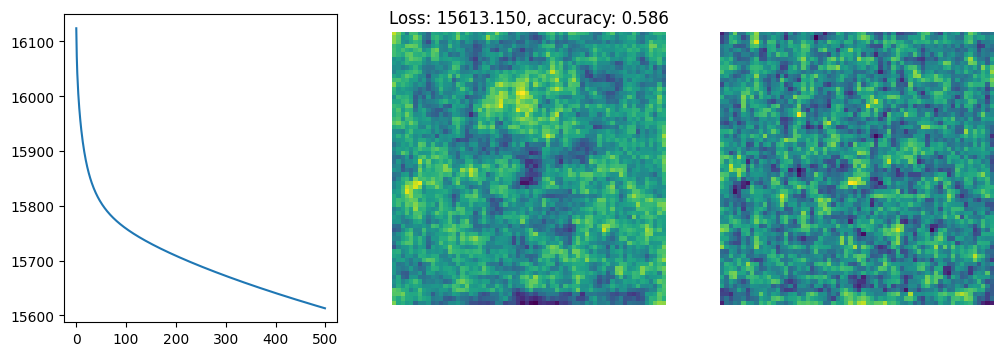

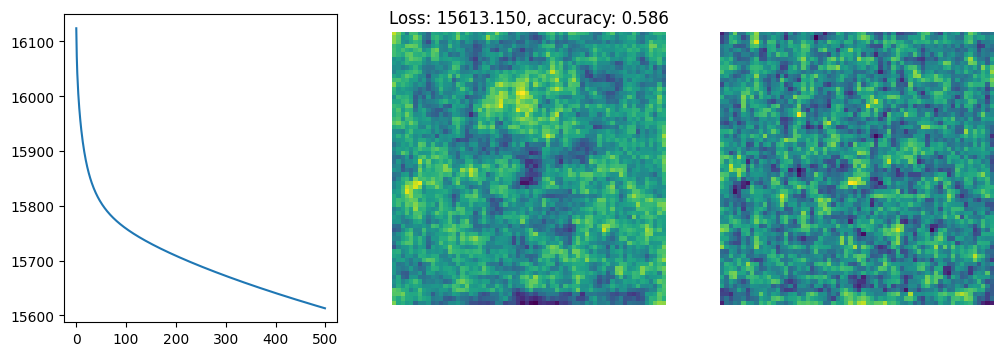

In [50]:
import time
from IPython import display

def nll_and_grad(w, X, y):
    return nll(w, X, y), grad(w, X, y)

def gradient_descent(value_and_grad, w0, lr, steps, X, y):
    f, ax = plt.subplots(1, 3, figsize=(12,4))

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, X, y)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax]
        display.clear_output(wait =True)
        
        ax[1].axis('off')
        ax[2].axis('off')
        ax[0].plot(losses)
        ax[1].imshow(weights[:-1].reshape(images[0].shape))
        ax[2].imshow(g[:-1].reshape(images[0].shape))
        ax[1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))
        display.display(f)
        time.sleep(0.001)
        
    return weights, losses

w = np.zeros(X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, X, y)


KeyboardInterrupt: 

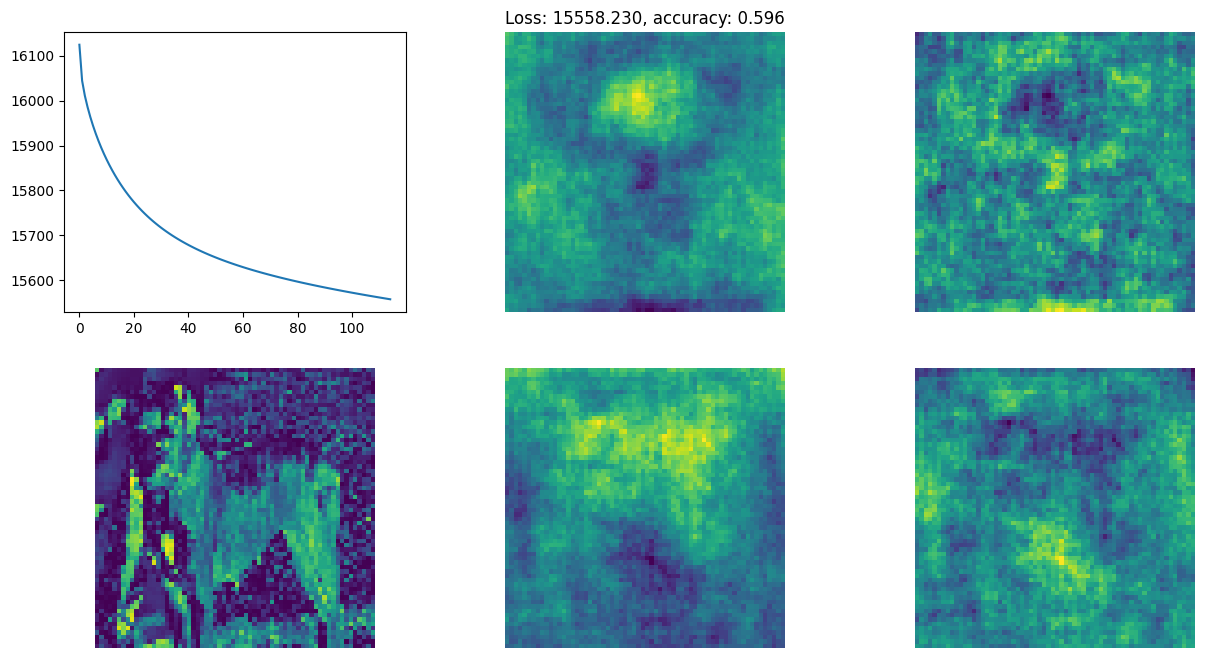

In [236]:
def gradient_descent(value_and_grad, w0, lr, steps, X, y, images):
    dims = np.array(images[0].shape).prod()

    f, ax = plt.subplots(X.shape[1] // dims, 3, figsize=(15,8))

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, X, y)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax.flatten()]
        [a.axis('off') for a in ax.flatten()[1:]]
        display.clear_output(wait =True)
        
        ax[0, 0].plot(losses)
        

        ax[0, 1].imshow(weights[:dims].reshape(images[0].shape))
        ax[0, 2].imshow(g[:dims].reshape(images[0].shape))
        ax[0, 1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))

        for j in range(1, ax.shape[0]):
            ax[j, 1].imshow(weights[(dims * j):(dims * (j+1))].reshape(images[0].shape))
            ax[j, 2].imshow(g[(dims * j):(dims * (j+1))].reshape(images[0].shape))
            ax[j, 0].imshow((X[0, (dims * j):(dims * (j+1))].reshape(images[0].shape)) )

        display.display(f)
        time.sleep(0.001)
        
    return weights, losses

phi_X = np.concatenate([X, X ** 2], axis=1)
w = np.zeros(phi_X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, phi_X, y, images)
plt.plot(losses)

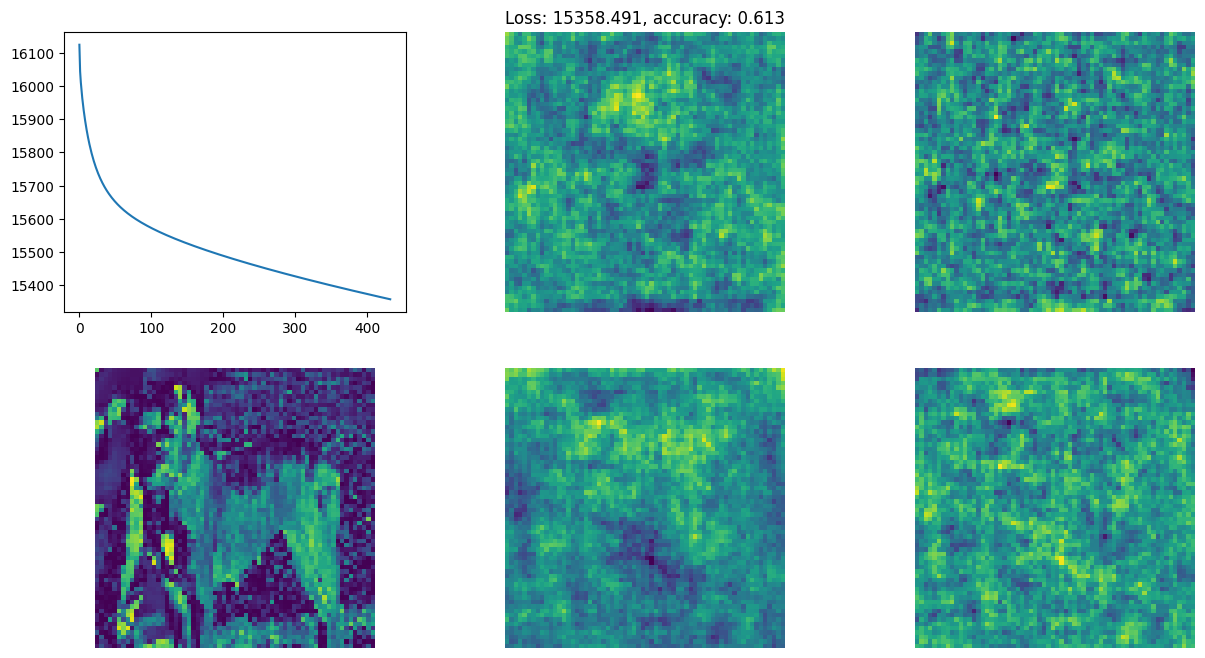

KeyboardInterrupt: 

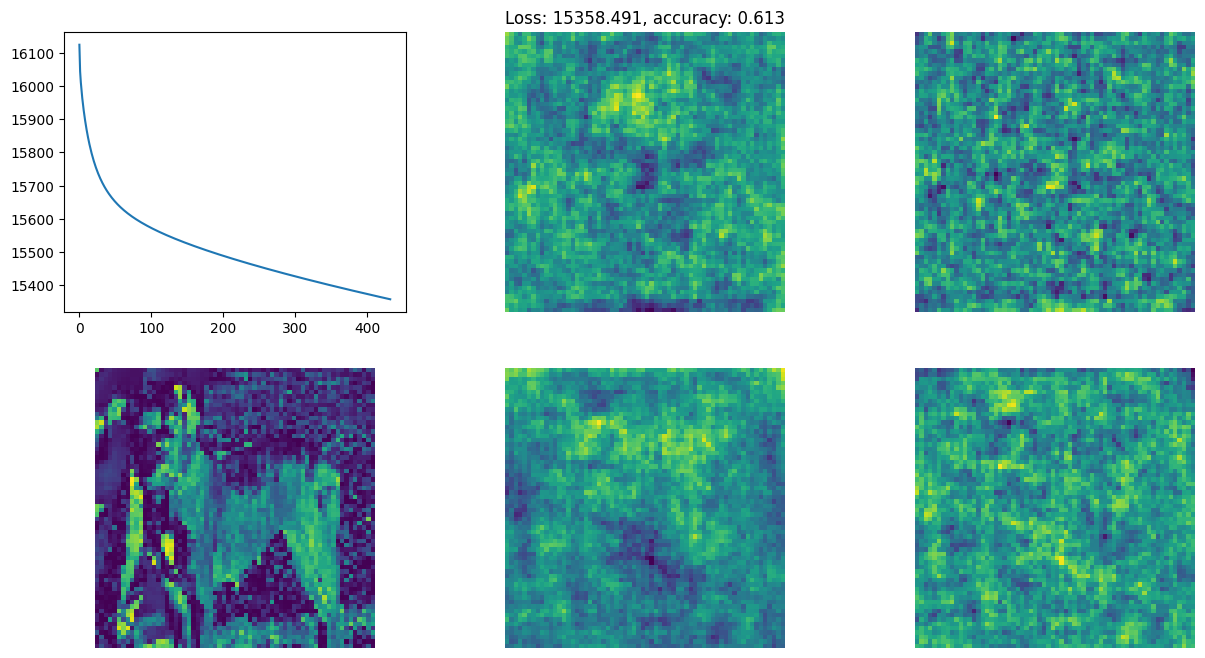

In [68]:
def gradient_descent(value_and_grad, w0, lr, steps, *args):
    f, ax = plt.subplots(2, 3, figsize=(15,8))
    X, y = args

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, *args)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax.flatten()]
        [a.axis('off') for a in ax.flatten()[1:]]
        display.clear_output(wait =True)
        
        ax[0, 0].plot(losses)
        dims = np.array(images[0].shape).prod()

        ax[0, 1].imshow(weights[:dims].reshape(images[0].shape))
        ax[0, 2].imshow(g[:dims].reshape(images[0].shape))
        ax[0, 1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))

        ax[1, 1].imshow(weights[dims:-1].reshape(images[0].shape))
        ax[1, 2].imshow(g[dims:-1].reshape(images[0].shape))
        ax[1, 0].imshow((images[0] ** 2) )
        display.display(f)
        time.sleep(0.001)
        
    return weights, losses

phi_X = np.concatenate([X, X ** 2], axis=1)
w = np.zeros(phi_X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, phi_X, y)
plt.plot(losses)

In [112]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import autograd.numpy as np
cd = tfds.image_classification.CatsVsDogs()
cd.download_and_prepare()

def preprocess(x):
    x = tf.image.resize(x, (128, 128)).numpy()
    x = hog(x, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=False, channel_axis=-1)
    return tf.tensor(x)

data = tfds.as_numpy(cd.as_dataset(split='train', as_supervised=True).map(lambda x, y: (tf.image.resize(x, (128, 128)), y)
).batch(100000))
images, labels = next(iter(data))
images, labels = images[labels <= 1], labels[labels <= 1].astype(float)

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 396 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


In [114]:
import tqdm.notebook as tqdm
X = np.stack([hog(xi, orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=False, channel_axis=-1) for xi in tqdm.tqdm(images)])

  0%|          | 0/23262 [00:00<?, ?it/s]

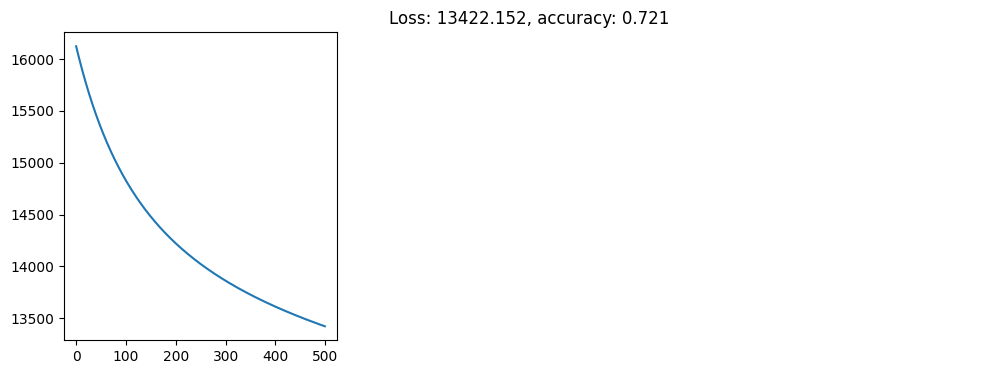

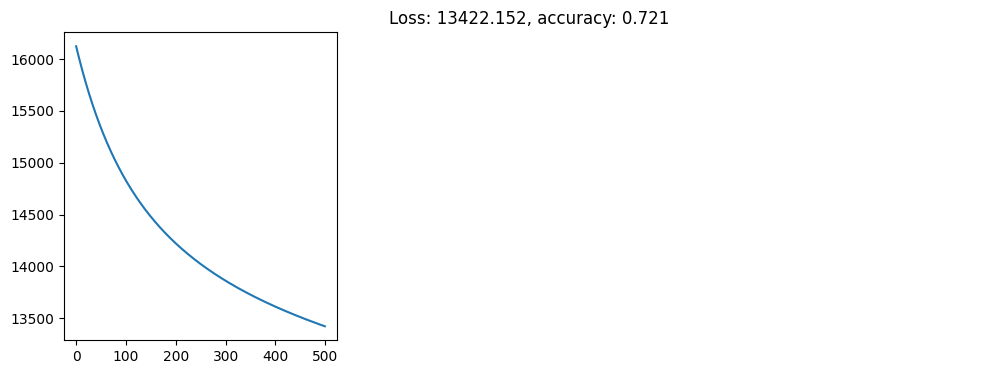

In [118]:
import time
from IPython import display

def nll_and_grad(w, X, y):
    return nll(w, X, y), grad(w, X, y)

def gradient_descent(value_and_grad, w0, lr, steps, X, y):
    f, ax = plt.subplots(1, 3, figsize=(12,4))

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, X, y)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax]
        display.clear_output(wait =True)
        
        ax[1].axis('off')
        ax[2].axis('off')
        ax[0].plot(losses)
        #ax[1].imshow(weights[:-1].reshape(images[0].shape))
        #ax[2].imshow(g[:-1].reshape(images[0].shape))
        ax[1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))
        display.display(f)
        time.sleep(0.001)
        
        
        

    return weights, losses

w = np.zeros(X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, X, y)

In [ ]:
import time
from IPython import display

def nll_and_grad(w, X, y):
    return nll(w, X, y), grad(w, X, y)

def gradient_descent(value_and_grad, w0, lr, steps, X, y):
    f, ax = plt.subplots(1, 3, figsize=(12,4))

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, X, y)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        [a.cla() for a in ax]
        display.clear_output(wait =True)
        
        ax[1].axis('off')
        ax[2].axis('off')
        ax[0].plot(losses)
        ax[1].imshow(weights[:-1].reshape(images[0].shape))
        ax[2].imshow(g[:-1].reshape(images[0].shape))
        ax[1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))
        display.display(f)
        time.sleep(0.001)
        
        
        

    return weights, losses

w = np.zeros(X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, X, y)

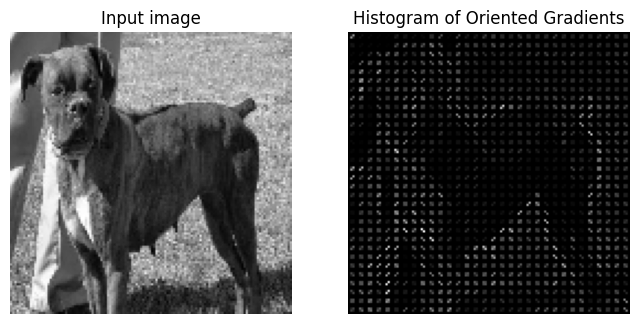

In [102]:

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

fd, hog_image = hog(images[0][:, :, None], orientations=8, pixels_per_cell=(4, 4),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(images[0], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [104]:
64 * 64

4096

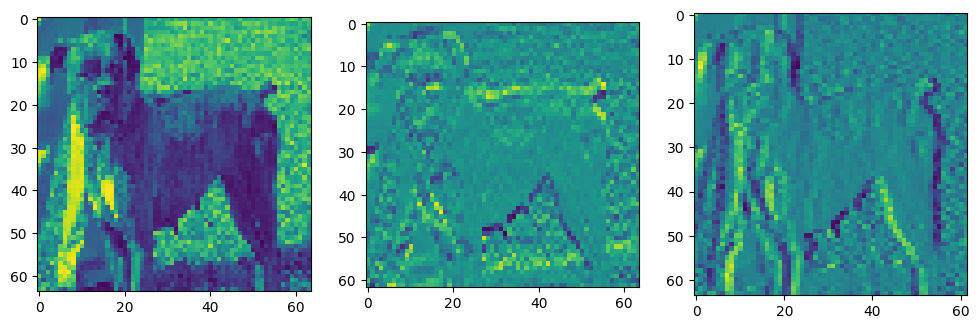

In [62]:
f, ax = plt.subplots(1, 3, figsize=(12, 4))
vedges = (images[:, :-2] - images[:, 2:])
hedges = (images[:, :, :-2] - images[:, :, 2:])

ax[0].imshow(images[0])
ax[1].imshow(vedges[0])
ax[2].imshow(hedges[0])

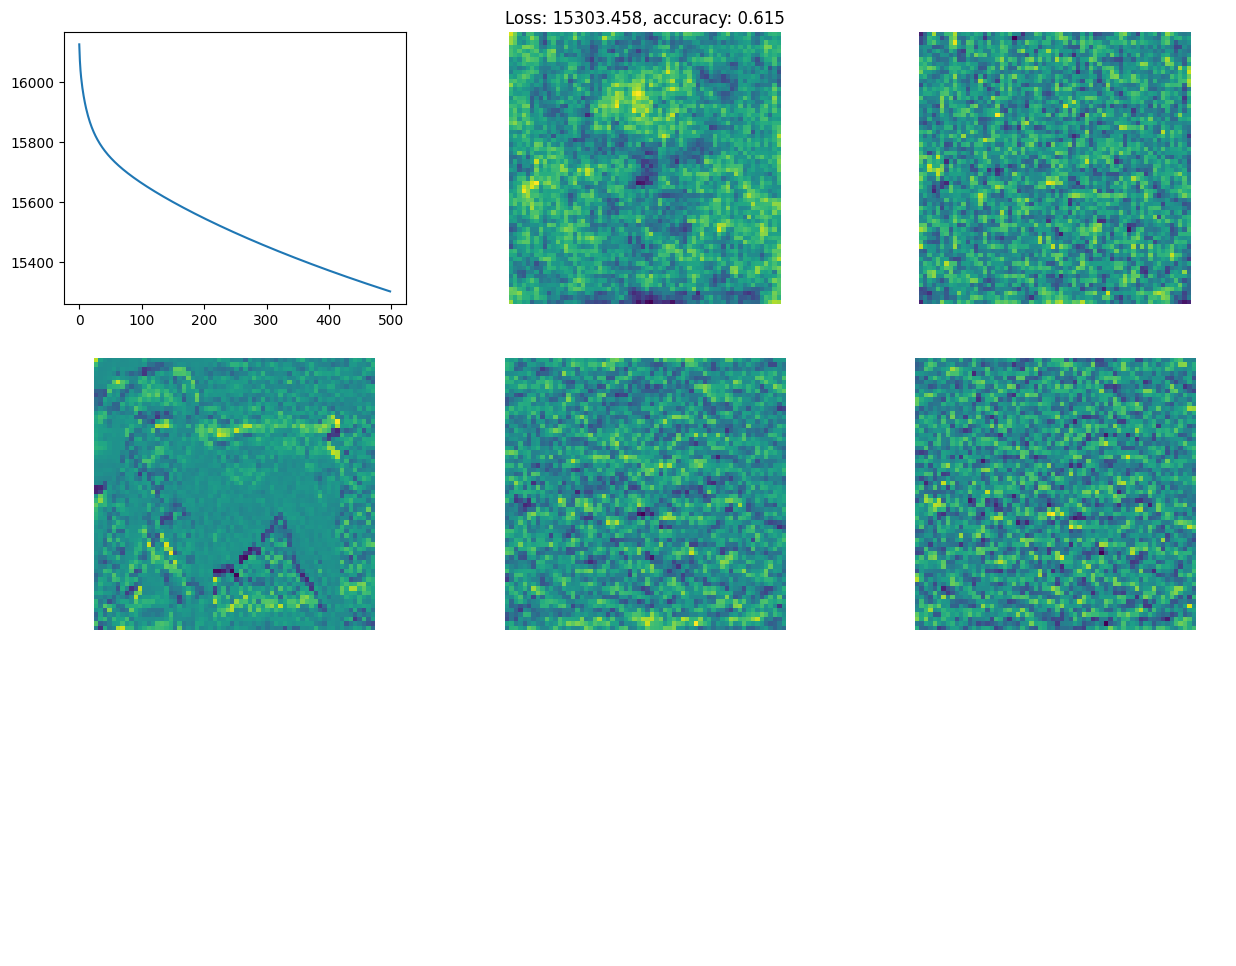

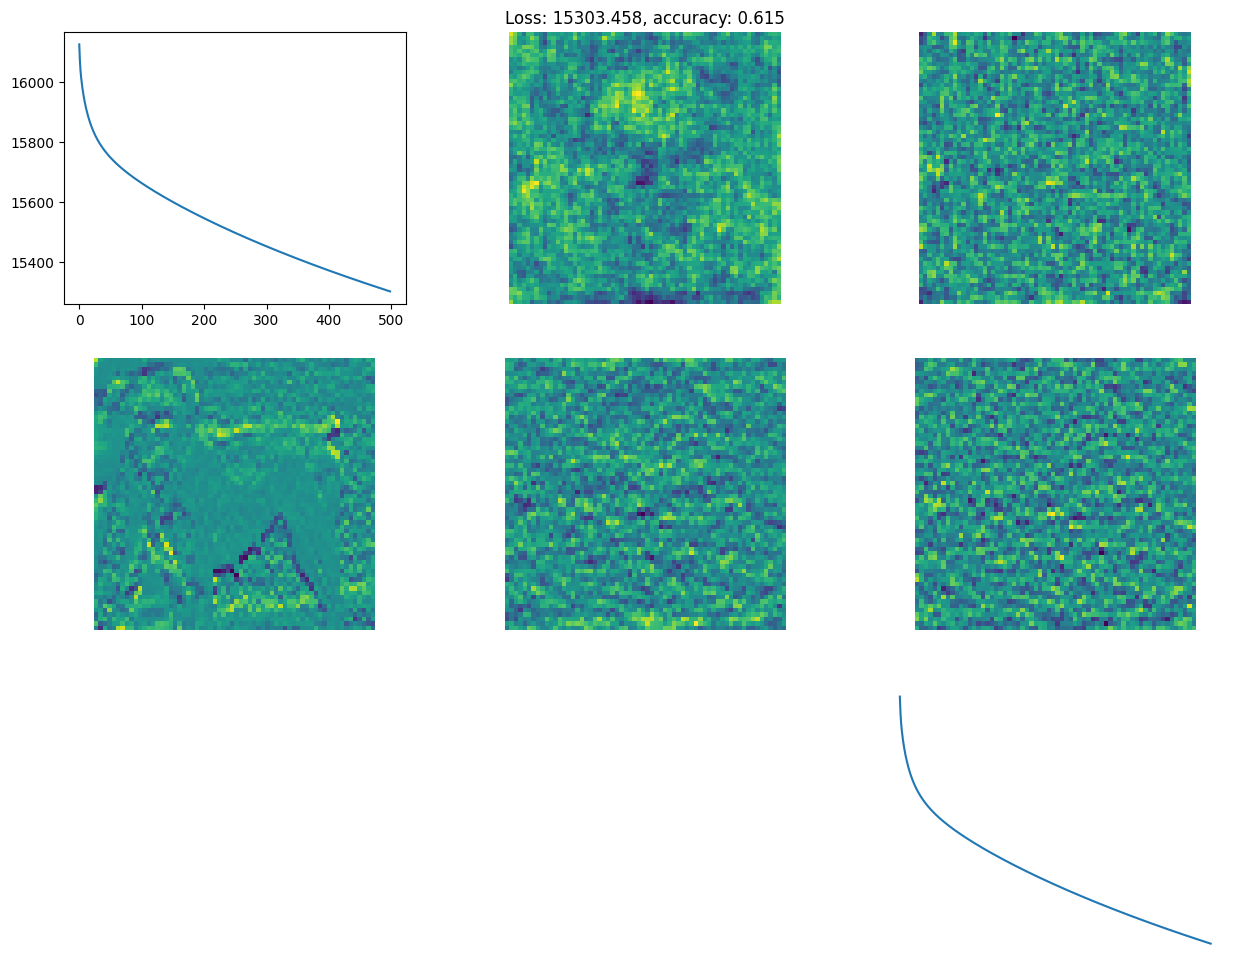

In [76]:
def gradient_descent(value_and_grad, w0, lr, steps, *args):
    f, ax = plt.subplots(3, 3, figsize=(15,12))
    X, y = args

    losses = []
    weights = w0
    for i in range(steps):
        loss, g = value_and_grad(weights, *args)
        weights = weights - lr * g
        losses.append(loss)


        # Plotting code
        
        if i % 3 == 0:
            [a.cla() for a in ax.flatten()]
            [a.axis('off') for a in ax.flatten()[1:]]
            display.clear_output(wait =True)
            
            ax[0, 0].plot(losses)
            dims = np.array(images[0].shape).prod()
            vdims = np.array(vedges[0].shape).prod()

            ax[0, 1].imshow(weights[:dims].reshape(images[0].shape))
            ax[0, 2].imshow(g[:dims].reshape(images[0].shape))
            ax[0, 1].set_title('Loss: %.3f, accuracy: %.3f' % (loss, accuracy(X, y, weights)))

            ax[1, 1].imshow(weights[dims:(dims + vdims)].reshape(vedges[0].shape))
            ax[1, 2].imshow(g[dims:(dims + vdims)].reshape(vedges[0].shape))
            ax[1, 0].imshow((vedges[0]) )
            display.display(f)
            time.sleep(0.001)
        
    return weights, losses
phi_X = np.concatenate([X, vedges.reshape((X.shape[0], -1)), hedges.reshape((X.shape[0], -1))], axis=1)
w = np.zeros(phi_X.shape[1] + 1)
weights, losses = gradient_descent(nll_and_grad, np.zeros_like(w), 0.0000003, 500, phi_X, y)
plt.plot(losses)